# AFAME TECHNOLOGIES
## DATA ANALYST INTERNSHIP
## Name: Pavithiran.V
### task 2 Titanic DataSet

In [154]:
import pandas as pd
import numpy as np

In [155]:
# Load the dataset
file_path = '/kaggle/input/titanic/train.csv'
df = pd.read_csv(file_path)

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering or Pre-Processing

### Handle Missing Values


In [157]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
def random_sample_impute_inplace(data,feature):
    data[feature]=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [159]:
# handling missing values in Age feature
random_sample_impute_inplace(df, 'Age')

In [160]:
# handling missing values in Cabin feature
df.drop('Cabin', axis=1, inplace=True)

In [161]:
# handling missing values in Embarked feature
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_34/4258754980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [162]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encode Categorical Variables


In [163]:
# Encode Sex feature
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [164]:
# Encode 'Embarked' feature using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


### Scale Numerical Features

In [166]:
from sklearn.preprocessing import StandardScaler
scalable_feature = ['Age', 'Fare']
scaler = StandardScaler()
df[['Age_scl', 'Fare_scl']] = scaler.fit_transform(df[scalable_feature])

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Age_scl,Fare_scl
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,-0.529034,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,0.570208,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,-0.254224,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,0.364100,0.420730
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,0.364100,-0.486337


### Train Test Split

In [168]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'Age', 'Fare'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

## Exploratory Data Analysis

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  Age_scl      891 non-null    float64
 13  Fare_scl     891 non-null    float64
dtypes: bool(2), float64(4), int64(6), object(2)
memory usage: 85.4+ KB


In [172]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_scl,Fare_scl
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,2.308642,0.352413,29.700348,0.523008,0.381594,32.204208,-2.153160e-16,3.987333e-18
std,257.353842,0.486592,0.836071,0.477990,14.563654,1.102743,0.806057,49.693429,1.000562e+00,1.000562e+00
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-2.011638e+00,-6.484217e-01
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,-5.977370e-01,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,-1.168184e-01,-3.573909e-01
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,5.702081e-01,-2.424635e-02
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.455719e+00,9.667167e+00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


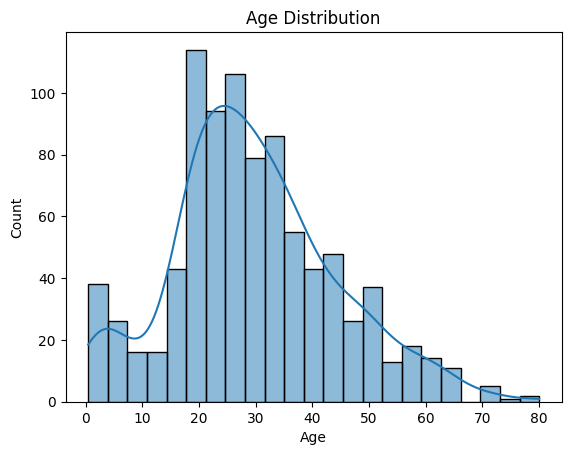

In [173]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


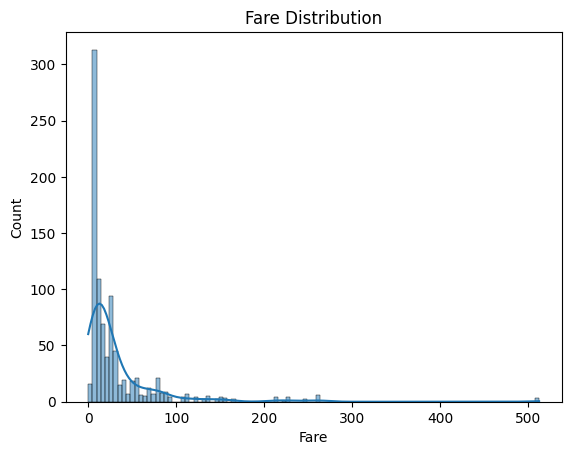

In [174]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

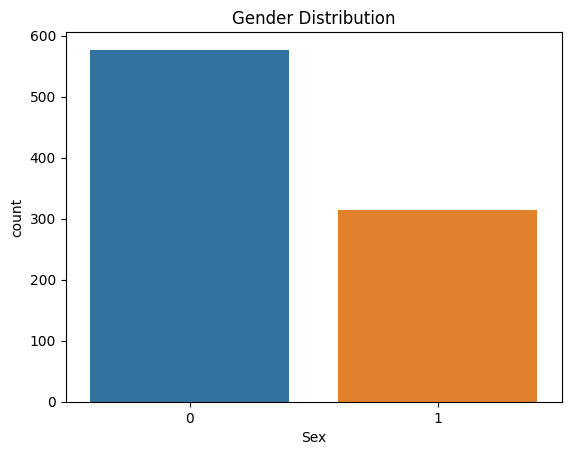

In [175]:
sns.countplot(x='Sex', data = df)
plt.title('Gender Distribution')
plt.show()

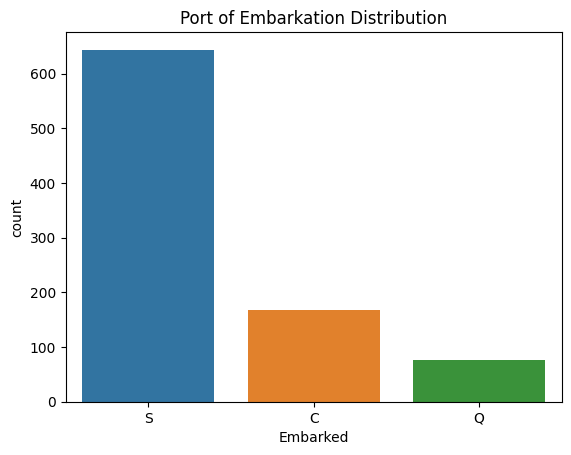

In [176]:
# Count plot for 'Embarked'
data = data=pd.read_csv('/kaggle/input/titanic/train.csv')
sns.countplot(x='Embarked', data = data)
plt.title('Port of Embarkation Distribution')
plt.show()

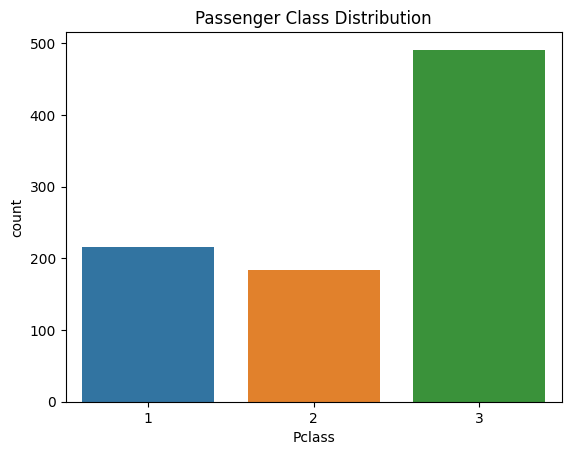

In [177]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

## Questions

In [178]:
###  What is the overall survival rate?
print("The Overall Survial rate: {}".format(df['Survived'].mean()))

The Overall Survial rate: 0.3838383838383838


In [179]:
# How many passengers were there in each class?
passengers_per_class = df['Pclass'].value_counts()
passengers_per_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [180]:
# What is the survival rate for each passenger class?
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [181]:
# What is the survival rate for each gender?
df.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [182]:
# What is the distribution of ages?
df['Age'].describe()

count    891.000000
mean      29.700348
std       14.563654
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

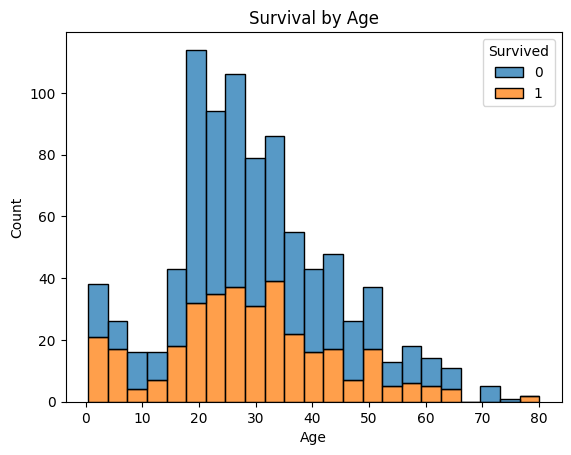

In [183]:
# How does age affect survival?
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival by Age')
plt.show()

In [184]:
# What is the distribution of fares?
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

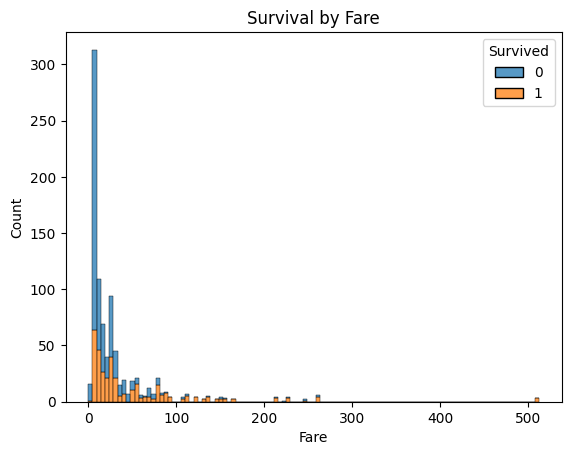

In [185]:
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack')
plt.title('Survival by Fare')
plt.show()

In [186]:
# How many passengers embarked from each port?
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [187]:
# What is the survival rate for passengers from each port?
data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [188]:
# What is the survival rate based on the number of siblings/spouses aboard?
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [189]:
# What is the survival rate based on the number of parents/children aboard?
df.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [190]:
# What is the distribution of siblings/spouses aboard?
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [191]:
# What is the distribution of parents/children aboard?
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

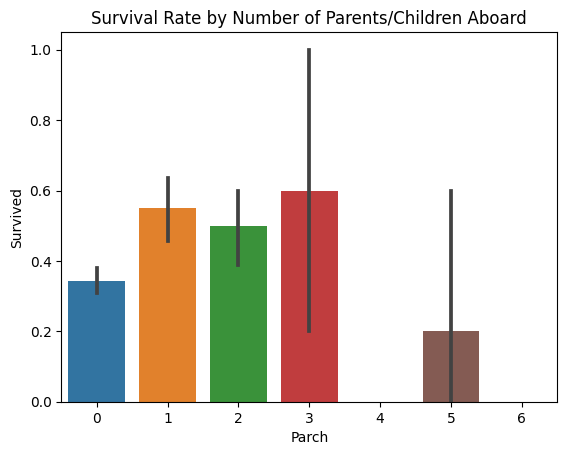

In [192]:
# How does the number of parents/children aboard affect survival?
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

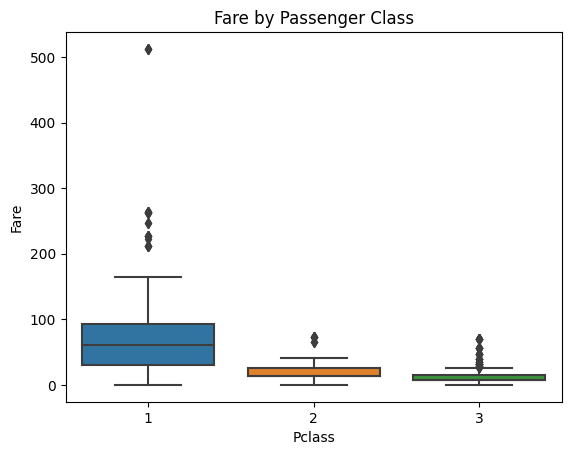

In [193]:
# What is the relationship between fare and passenger class?
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

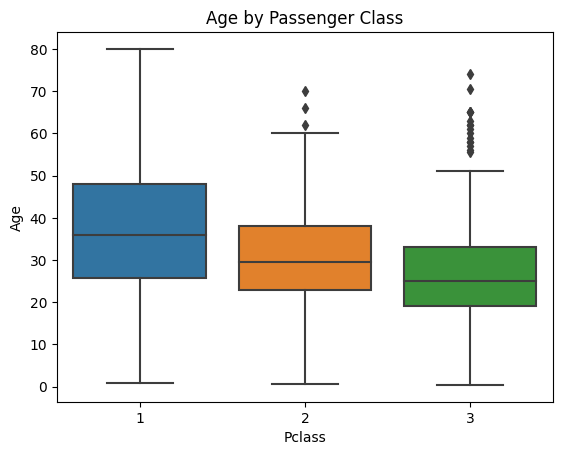

In [194]:
# Is there a relationship between age and passenger class?
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age by Passenger Class')
plt.show()

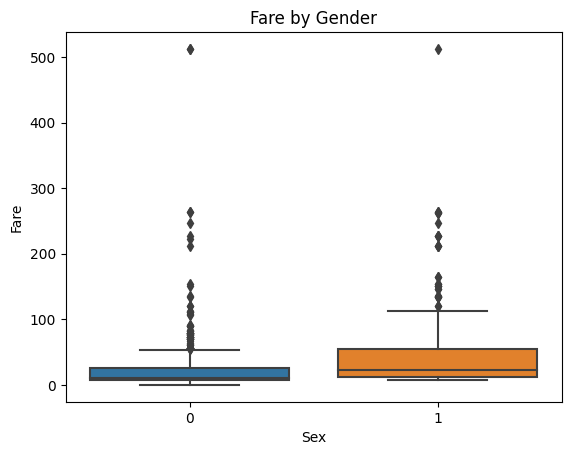

In [195]:
# What is the relationship between fare and gender?
sns.boxplot(x='Sex', y='Fare', data=df)
plt.title('Fare by Gender')
plt.show()

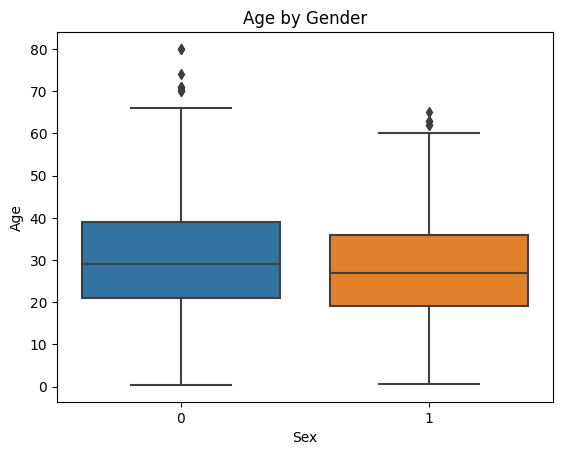

In [196]:
# Is there a relationship between age and gender?
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age by Gender')
plt.show()

In [197]:
# What is the survival rate for children (age < 18)?
df[df['Age'] < 18]['Survived'].mean()

0.48201438848920863

In [198]:
# What is the survival rate for seniors (age >= 60)?
df[df['Age'] >= 60]['Survived'].mean()

0.3333333333333333

In [199]:
# What is the survival rate for people traveling alone (no siblings/spouses or parents/children aboard)?
df[(df['SibSp'] == 0) & (df['Parch'] == 0)]['Survived'].mean()

0.30353817504655495

In [200]:
# How many children were aboard?
df[df['Age'] < 18].shape[0]

139

In [201]:
# How many seniors were aboard?
df[df['Age'] >= 60].shape[0]

33

In [202]:
# How many passengers traveled alone?
df[(df['SibSp'] == 0) & (df['Parch'] == 0)].shape[0]

537

In [203]:
# What is the average fare paid by each passenger class?
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [204]:
# What is the average age of passengers in each class?
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.312130
2    30.124076
3    26.192994
Name: Age, dtype: float64

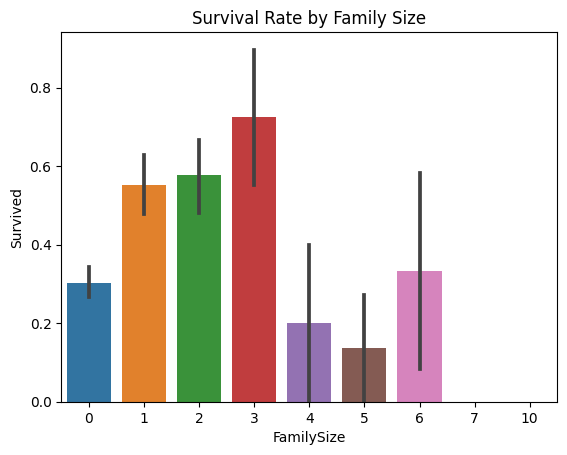

In [205]:
# Is there a relationship between family size (SibSp + Parch) and survival rate?

# Calculate family size
df['FamilySize'] = df['SibSp'] + df['Parch']

# Survival rate by family size
survival_rate_per_family_size = df.groupby('FamilySize')['Survived'].mean()
survival_rate_per_family_size

# Visualize the relationship
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

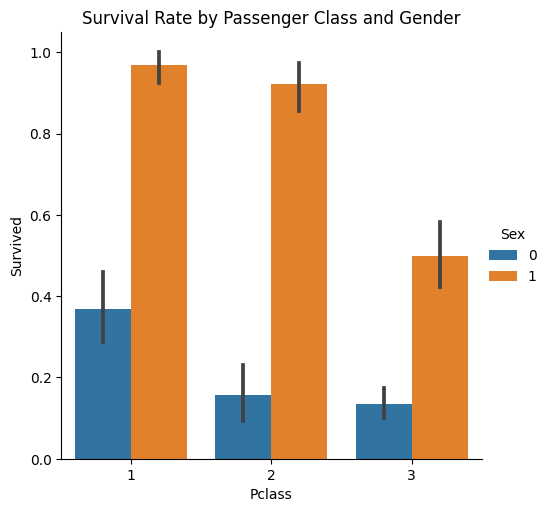

In [206]:
# How does the survival rate vary by passenger class and gender combined?
# Survival rate by passenger class and gender
survival_rate_per_class_gender = df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')
survival_rate_per_class_gender

# Visualize the relationship
sns.catplot(x='Pclass', hue='Sex', y='Survived', kind='bar', data=df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

In [207]:
# Is there a correlation between ticket fare and the likelihood of survival, adjusting for passenger class?
# Correlation matrix
correlation_matrix = df[['Survived', 'Fare', 'Pclass']].corr()
correlation_matrix



,Survived,Fare,Pclass
Survived,1.000000,0.257307,-0.338481
Fare,0.257307,1.000000,-0.549500
Pclass,-0.338481,-0.549500,1.000000


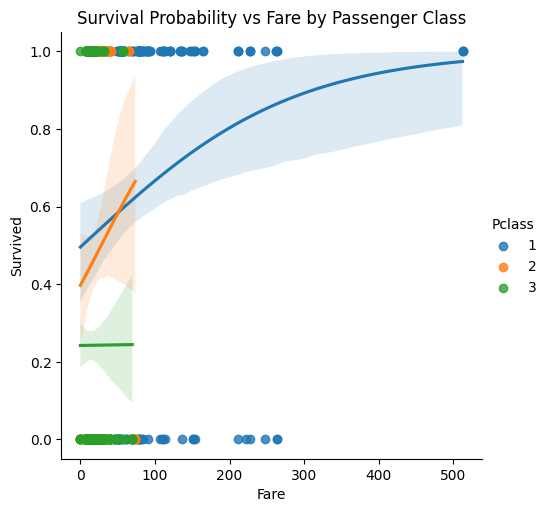

In [208]:
# Visualize the relationship
sns.lmplot(x='Fare', y='Survived', hue='Pclass', data=df, logistic=True)
plt.title('Survival Probability vs Fare by Passenger Class')
plt.show()


In [209]:
# How does the port of embarkation influence survival rates, and does it differ by passenger class?
# Survival rate by port of embarkation and passenger class
survival_rate_per_embarked_class = data.pivot_table('Survived', index='Embarked', columns='Pclass', aggfunc='mean')
survival_rate_per_embarked_class


Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


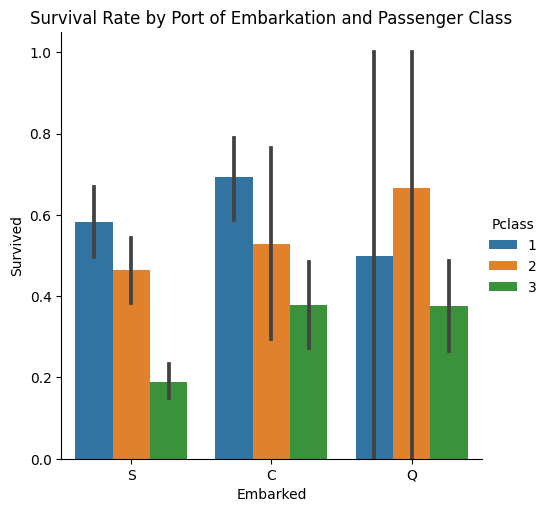

In [210]:
# Visualize the relationship
sns.catplot(x='Embarked', hue='Pclass', y='Survived', kind='bar', data=data)
plt.title('Survival Rate by Port of Embarkation and Passenger Class')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

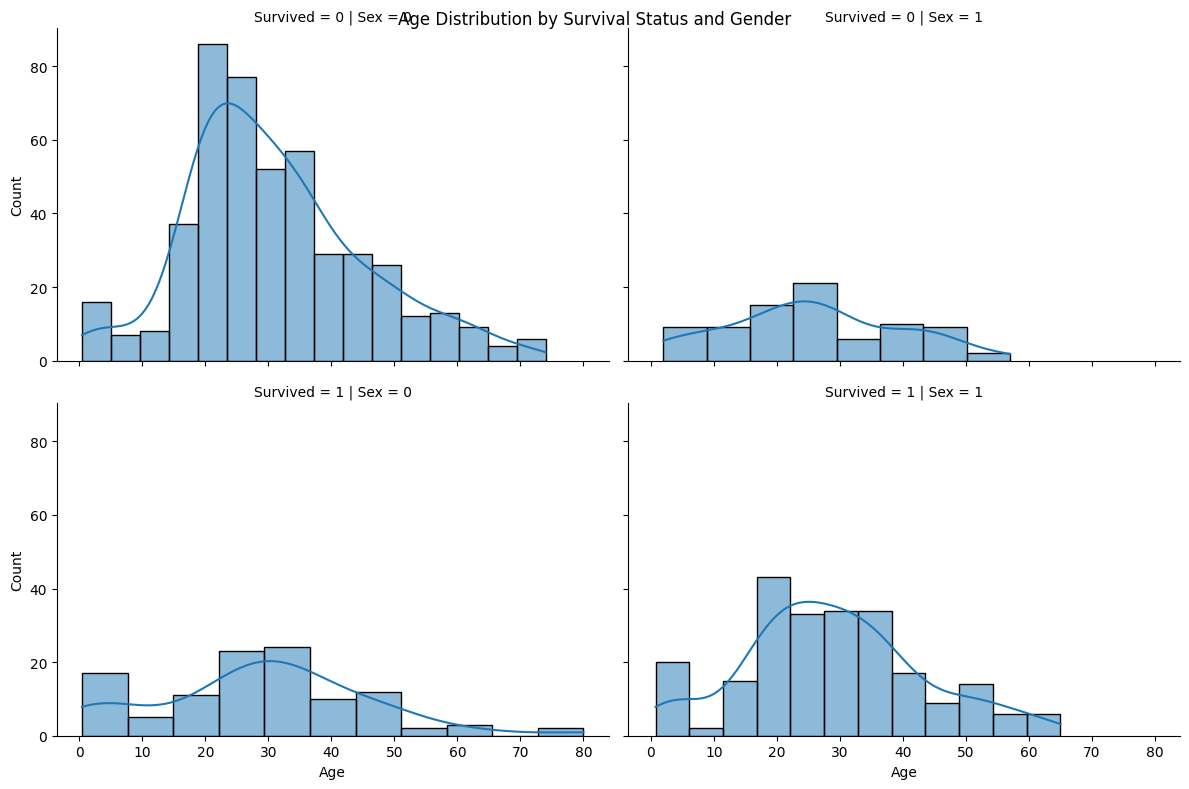

In [211]:
# What are the age distributions for survivors and non-survivors, and how do they differ by gender?
# Age distribution by survival status and gender
g = sns.FacetGrid(df, row='Survived', col='Sex', height=4, aspect=1.5)
g.map(sns.histplot, 'Age', kde=True)
plt.suptitle('Age Distribution by Survival Status and Gender')
plt.show()